# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we explore some of the textual features of those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [52]:
import os
# import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")


In [53]:
# Add any additional import statements you need here
from lexical_diversity import lex_div as ld
import csv
import html
import textacy.preprocessing as tprep
import spacy
import regex as re


In [3]:
spacy.load('en_core_web_sm')

In [4]:
# change `data_location` to the location of the folder on your machine.
data_location = "C:\\Users\\zfreitas\\Dropbox\\Classes\\USD\\ADS-509-01-SP23 - Applied Text Mining\\2. Module Two\\Assignment 1\\M1 Results\\"
# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter\\"
lyrics_folder = "lyrics\\"


In [75]:
def descriptive_stats(tokens, top_n_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """
    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = ld.ttr(tokens) # Simple TTR = len(Counter(text))/len(text)
    num_characters = sum([len(i) for i in tokens])
    
    if verbose:        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        print(f"The top {top_n_tokens} most common tokens")
        print(Counter(tokens).most_common(top_n_tokens))
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [76]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The top 5 most common tokens
[('text', 3), ('here', 2), ('example', 2), ('is', 1), ('some', 1)]


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements are a way to make sure your code is working as you expect it to. You create examples that you know to be true and have the answer for. Then you run your code through your predefined examples to make sure it is running as expected.
  

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [7]:
# # Dictionary Approach 1 - first

# d[artist][title] = “the song lyrics as a string”
# d = {}
# # Get the directory location
# directory = data_location + lyrics_folder
# # Get all the subfolders in directory.
# artist_subfolders = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]


# # Get all the files in each of the subfolders
# for artist in artist_subfolders:
#     d[artist] = {}
#     for filename in os.listdir(directory + artist):
#         f = os.path.join(directory + artist, filename)
#         # checking if it is a file
#         if os.path.isfile(f):
#             with open(f) as file:
#                 title = file.readline().strip()
#                 d[artist][title] = file.read().strip()


In [8]:
# Read in the lyrics data

# Dictionary Approach 2 - Using defaultdict

# d[artist][title] = “the song lyrics as a string”
lyrics = defaultdict(lambda: defaultdict(str))
#  
# Get the directory location
directory = data_location + lyrics_folder
# Get all the subfolders in directory.
artist_subfolders = [name for name in os.listdir(directory) if os.path.isdir(os.path.join(directory, name))]


# Get all the files in each of the subfolders
for artist in artist_subfolders:
    for filename in os.listdir(directory + artist):
        f = os.path.join(directory + artist, filename)
        # checking if it is a file
        if os.path.isfile(f):
            with open(f) as file:
                title = file.readline().strip()
                lyrics[artist][title] = file.read().strip()

In [9]:
lyrics["robyn"].get('"88 Days"')

"I light a candle in the morning \nTo signify that your still on my mind\nDarkness arrived without a warning \nIt brought me down\nBut I know the world just keeps on turning\n\nI wish that I could turn you on \nLike a switch in my kitchen \nRight before dawn\n88 days seems so long\nI believe in you and me\nBut it's so hard to trust\nSomething you just can't see, still I've got\n\n[CHORUS]\n88 days 'til the sun\nAnd while you're gone\nI've got so much work inside my heart to be done, I've got\n88 days 'til the sun\nI`ve got to get my spirit ready\nFor when the springtime comes\n88 days 'til the sun\n\nZip up my thickest jacket \nI miss the green and the light you gave to me\nPrepare to get my feet wet\nHalogen's on bright when 2 pm is like 2 in the night, it ain't right\nSo what's the message in this song\nThat the pain doesn't mean that you can't carry on\nStill 88 days seem so long\nA meditation, a revelation\nBut it's so hard to trust\nSomething you just can't see, still I've got\n\n

In [10]:
print(len(lyrics['cher']))
print(len(lyrics['robyn']))

313
93


In [23]:
# Create lyrics Pandas Dataframe for Cleaning
artists = ['cher', 'robyn']

for i, artist in enumerate(artists):
    if i == 0:
        lyrics_df = pd.DataFrame(lyrics[artist].items(), columns=['title', 'lyrics'])
        lyrics_df['artist'] = artist
    lyrics_dfi = pd.DataFrame(lyrics[artist].items(), columns=['title', 'lyrics'])
    lyrics_dfi['artist'] = artist
    lyrics_df = pd.concat([lyrics_df, lyrics_dfi], ignore_index=True)

lyrics_df = lyrics_df.fillna(value='')
lyrics_df


,title,lyrics,artist
0,"""88 Degrees""","Stuck in L.A., ain't got no friends \nAnd so H...",cher
1,"""A Different Kind Of Love Song""",What if the world was crazy and I was sane\nWo...,cher
2,"""After All""","Well, here we are again\nI guess it must be fa...",cher
3,"""Again""",Again evening finds me at your door \nHere to ...,cher
4,"""Alfie""","What's it all about, Alfie?\nIs it just for th...",cher
...,...,...,...
714,"""We Dance To The Beat""",We dance to the beat\nWe dance to the beat\nWe...,robyn
715,"""Where Did Our Love Go""",Thoughts about you and me \nThinkin' about wha...,robyn
716,"""Who's That Girl""",Good girls are pretty like all the time\nI'm j...,robyn
717,"""With Every Heartbeat""",Maybe we could make it all right\nWe could mak...,robyn


In [12]:
# Read in the twitter data

# Dictionary Approach 2 - Using defaultdict
""""For the Twitter data, we only need the description field for this assignment. 
Feel free all the descriptions read it into a data structure. 
In the solution, I stored the descriptions as a dictionary of lists, 
with the key being the artist. 
"""
maxInt = sys.maxsize

while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)

# d[artist][title] = “the song lyrics as a string”
desc = defaultdict(list)
#  
artists = ['cher', 'robyn']
filename = ['cher_followers_data.txt', 'robynkonichiwa_followers_data.txt']

# Get the directory location
directory = data_location + twitter_folder

# Get all the files in each of the subfolders
for i, artist in enumerate(artists):
    f = os.path.join(directory, filename[i])
    # checking if it is a file
    if os.path.isfile(f):
        with open(f, encoding="utf8") as f:
            reader = csv.DictReader(f, delimiter="\t") # read rows into a dictionary format
            for row in reader: # read a row as {column1: value1, column2: value2,...}
                for (k,v) in row.items(): # go over each column name and value 
                    if k == "description":
                        # append the value into the appropriate list
                        # based on column name k                        
                        desc[artist].append(v)



In [13]:
# Create Pandas Dataframe for Cleaning
for i, artist in enumerate(artists):
    if i == 0:
        twitter_df = pd.DataFrame.from_dict(desc[artist], orient='columns')
        twitter_df.rename({0:"description"}, inplace=True,  axis=1)
        twitter_df['artist'] = artist
    twitter_dfi = pd.DataFrame.from_dict(desc[artist])
    twitter_dfi.rename({0:"description"}, inplace=True,  axis=1)
    twitter_dfi['artist'] = artist
    twitter_df = pd.concat([twitter_df, twitter_dfi], ignore_index=True)


twitter_df = twitter_df.fillna(value="")
twitter_df

,description,artist
0,,cher
1,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,csu,cher
4,Writer @Washinformer @SpelmanCollege alumna #D...,cher
...,...,...
8184476,"singer of songs, type 1 diabetic, tired $jakel...",robyn
8184477,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...,robyn
8184478,A year to change a life is still a year ✨😌,robyn
8184479,Head of Consumer - Mango. Made in Melbourne. R...,robyn


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [79]:
punctuation = set(punctuation) # speeds up comparison

In [54]:
# Helper functions - Cleaning data



def clean(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # Remove Puncuation
    def remove_punc(s):
        return ''.join(ch for ch in s if ch not in punctuation)
    text = remove_punc(text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    return text.strip()



def normalize(text):
    text = tprep.normalize.hyphenated_words(text)
    text = tprep.normalize.quotation_marks(text)
    text = tprep.normalize.unicode(text)
    text = tprep.remove.accents(text)
    return text

def tokenize(text):
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)

def remove_stop(tokens):
    return [t for t in tokens if t.lower() not in sw]





In [57]:
# create your clean twitter data here
twitter_df['clean_description'] = twitter_df['description'].map(clean)
# Normalize Text
twitter_df['normalized_description'] = twitter_df['clean_description'].map(normalize)
# Tokenized Data
twitter_df['tokenized'] = twitter_df['normalized_description'].map(tokenize)
# Remove Stop Words
twitter_df['tokens'] = twitter_df['tokenized'].map(remove_stop)

twitter_df


,description,artist,clean_description,normalized_description,tokenized,tokens
0,,cher,,,[],[]
1,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,Proud supporter of messy buns leggings,"[Proud, supporter, of, messy, buns, leggings]","[Proud, supporter, messy, buns, leggings]"
2,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,163cm/愛かっふ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,"[163cm, 愛かっふ, 26歳, 工〇好きな女の子, フォローしてくれたらDMします]","[163cm, 愛かっふ, 26歳, 工〇好きな女の子, フォローしてくれたらDMします]"
3,csu,cher,csu,csu,[csu],[csu]
4,Writer @Washinformer @SpelmanCollege alumna #D...,cher,Writer Washinformer SpelmanCollege alumna DCna...,Writer Washinformer SpelmanCollege alumna DCna...,"[Writer, Washinformer, SpelmanCollege, alumna,...","[Writer, Washinformer, SpelmanCollege, alumna,..."
...,...,...,...,...,...,...
8184476,"singer of songs, type 1 diabetic, tired $jakel...",robyn,singer of songs type 1 diabetic tired jakelgil...,singer of songs type 1 diabetic tired jakelgil...,"[singer, of, songs, type, diabetic, tired, jak...","[singer, songs, type, diabetic, tired, jakelgi..."
8184477,Dadx2/ Con-Arch/ Photographer/ DK #stemgrønnes...,robyn,Dadx2 ConArch Photographer DK stemgrønnest grø...,Dadx2 ConArch Photographer DK stemgrønnest grø...,"[Dadx2, ConArch, Photographer, DK, stemgrønnes...","[Dadx2, ConArch, Photographer, DK, stemgrønnes..."
8184478,A year to change a life is still a year ✨😌,robyn,A year to change a life is still a year ✨😌,A year to change a life is still a year ✨😌,"[A, year, to, change, a, life, is, still, a, y...","[year, change, life, still, year]"
8184479,Head of Consumer - Mango. Made in Melbourne. R...,robyn,Head of Consumer Mango Made in Melbourne Rambl...,Head of Consumer Mango Made in Melbourne Rambl...,"[Head, of, Consumer, Mango, Made, in, Melbourn...","[Head, Consumer, Mango, Made, Melbourne, Rambl..."


In [59]:
# Save Data for Later Use
twitter_df.to_pickle("twitter_df.pkl")
# twitter_df = pd.read_pickle("twitter_df.pkl")

In [56]:
# create your clean lyrics data here
lyrics_df['clean_lyrics'] = lyrics_df['lyrics'].map(clean)
# Normalize Text
lyrics_df['normalized_lyrics'] = lyrics_df['clean_lyrics'] .map(normalize)
# Tokenized Data
lyrics_df['tokenized'] = lyrics_df['normalized_lyrics'].map(tokenize)
# Remove Stop Words
lyrics_df['tokens'] = lyrics_df['tokenized'].map(remove_stop)

lyrics_df

,title,lyrics,artist,clean_lyrics,normalized_lyrics,tokenized,tokens
0,"""88 Degrees""","Stuck in L.A., ain't got no friends \nAnd so H...",cher,Stuck in LA aint got no friends And so Hollywo...,Stuck in LA aint got no friends And so Hollywo...,"[Stuck, in, LA, aint, got, no, friends, And, s...","[Stuck, LA, aint, got, friends, Hollywood, nut..."
1,"""A Different Kind Of Love Song""",What if the world was crazy and I was sane\nWo...,cher,What if the world was crazy and I was sane Wou...,What if the world was crazy and I was sane Wou...,"[What, if, the, world, was, crazy, and, I, was...","[world, crazy, sane, Would, strange, cant, bel..."
2,"""After All""","Well, here we are again\nI guess it must be fa...",cher,Well here we are again I guess it must be fate...,Well here we are again I guess it must be fate...,"[Well, here, we, are, again, I, guess, it, mus...","[Well, guess, must, fate, Weve, tried, deep, i..."
3,"""Again""",Again evening finds me at your door \nHere to ...,cher,Again evening finds me at your door Here to as...,Again evening finds me at your door Here to as...,"[Again, evening, finds, me, at, your, door, He...","[evening, finds, door, ask, could, try, dont, ..."
4,"""Alfie""","What's it all about, Alfie?\nIs it just for th...",cher,Whats it all about Alfie Is it just for the mo...,Whats it all about Alfie Is it just for the mo...,"[Whats, it, all, about, Alfie, Is, it, just, f...","[Whats, Alfie, moment, live, Whats, sort, Alfi..."
...,...,...,...,...,...,...,...
714,"""We Dance To The Beat""",We dance to the beat\nWe dance to the beat\nWe...,robyn,We dance to the beat We dance to the beat We d...,We dance to the beat We dance to the beat We d...,"[We, dance, to, the, beat, We, dance, to, the,...","[dance, beat, dance, beat, dance, beat, dance,..."
715,"""Where Did Our Love Go""",Thoughts about you and me \nThinkin' about wha...,robyn,Thoughts about you and me Thinkin about what w...,Thoughts about you and me Thinkin about what w...,"[Thoughts, about, you, and, me, Thinkin, about...","[Thoughts, Thinkin, used, Love, strong, one, d..."
716,"""Who's That Girl""",Good girls are pretty like all the time\nI'm j...,robyn,Good girls are pretty like all the time Im jus...,Good girls are pretty like all the time Im jus...,"[Good, girls, are, pretty, like, all, the, tim...","[Good, girls, pretty, like, time, Im, pretty, ..."
717,"""With Every Heartbeat""",Maybe we could make it all right\nWe could mak...,robyn,Maybe we could make it all right We could make...,Maybe we could make it all right We could make...,"[Maybe, we, could, make, it, all, right, We, c...","[Maybe, could, make, right, could, make, bette..."


In [60]:
# Save Data for Later Use
lyrics_df.to_pickle("lyrics_df.pkl")
# lyrics_df = pd.read_pickle("lyrics_df.pkl")

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [99]:
# calls to descriptive_stats here

# Helper Function
def flatten_and_descriptive_stats(list_of_lists):
    wordlist = [i for s in list_of_lists for i in s]
    return descriptive_stats(wordlist)



print("\nLyrics Data for Cher:\n")
flatten_and_descriptive_stats(lyrics_df.loc[lyrics_df['artist']=='cher']["tokens"])


Lyrics Data for Cher:

There are 69548 tokens in the data.
There are 4334 unique tokens in the data.
There are 333830 characters in the data.
The lexical diversity is 0.062 in the data.
The top 5 most common tokens
[('love', 1622), ('Im', 1020), ('know', 942), ('dont', 626), ('see', 568)]


[69548, 4334, 0.062316673376660726, 333830]

In [100]:
print("\nLyrics Data for Robyn:\n")
flatten_and_descriptive_stats(lyrics_df[lyrics_df['artist']=='robyn']["tokens"])


Lyrics Data for Robyn:

There are 12931 tokens in the data.
There are 2409 unique tokens in the data.
There are 62136 characters in the data.
The lexical diversity is 0.186 in the data.
The top 5 most common tokens
[('Im', 254), ('know', 235), ('love', 214), ('got', 207), ('dont', 189)]


[12931, 2409, 0.1862964967906581, 62136]

In [101]:
print("\nTwitter Description Data for Cher:\n")
flatten_and_descriptive_stats(twitter_df.loc[twitter_df['artist']=='cher']["tokens"])


Twitter Description Data for Cher:

There are 30077144 tokens in the data.
There are 1476381 unique tokens in the data.
There are 183717856 characters in the data.
The lexical diversity is 0.049 in the data.
The top 5 most common tokens
[('love', 300980), ('Im', 215364), ('life', 198284), ('de', 138336), ('Love', 111376)]


[30077144, 1476381, 0.04908647576378927, 183717856]

In [102]:
print("\nTwitter Description Data for Robyn:\n")
flatten_and_descriptive_stats(twitter_df.loc[twitter_df['artist']=='robyn']["tokens"])


Twitter Description Data for Robyn:

There are 1443350 tokens in the data.
There are 275032 unique tokens in the data.
There are 9050822 characters in the data.
The lexical diversity is 0.191 in the data.
The top 5 most common tokens
[('music', 9293), ('love', 8118), ('och', 7774), ('Im', 6992), ('de', 6075)]


[1443350, 275032, 0.1905511483701112, 9050822]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: Most definatly the top 5 words would have been things like "a", "we", "here", and "the".

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I would have believe that the cher's lyrics would have been less complex than Robyn's and that is showing up in the lexical diversity. The songs that I know of from Cher tend to repeat a lot.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [103]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

<!-- What are the ten most common emojis by artist in the twitter descriptions?  -->




In [ ]:
# Your code here

# Tokenized emoji Data
twitter_df['emoji'] = twitter_df['description'].map(emoji.distinct_emoji_list)

In [131]:
# Helper Function
def flatten_and_descriptive_emoji_stats(list_of_lists):
    wordlist = [i for s in list_of_lists for i in s]
    return descriptive_stats(wordlist, 10)

print("\nTwitter emoji Data for Robyn:\n")
flatten_and_descriptive_emoji_stats(twitter_df.loc[twitter_df['artist']=='robyn']["emoji"])


Twitter emoji Data for Robyn:

There are 64524 tokens in the data.
There are 2378 unique tokens in the data.
There are 98870 characters in the data.
The lexical diversity is 0.037 in the data.
The top 10 most common tokens
[('🏳️\u200d🌈', 3071), ('❤️', 2088), ('♥', 1544), ('✨', 1510), ('🌈', 1265), ('❤', 1108), ('💙', 679), ('🎶', 623), ('💜', 622), ('🇺🇸', 572)]


[64524, 2378, 0.03685450375054243, 98870]

In [132]:
print("\nTwitter emoji Data for Cher:\n")
flatten_and_descriptive_emoji_stats(twitter_df.loc[twitter_df['artist']=='cher']["emoji"])


Twitter emoji Data for Cher:

There are 1881964 tokens in the data.
There are 3398 unique tokens in the data.
There are 2696220 characters in the data.
The lexical diversity is 0.002 in the data.
The top 10 most common tokens
[('❤️', 68448), ('🏳️\u200d🌈', 56630), ('❤', 41718), ('✨', 40764), ('💙', 32796), ('♥', 30076), ('🌈', 29848), ('💜', 25652), ('🇺🇸', 24080), ('🌊', 20878)]


[1881964, 3398, 0.001805560573953593, 2696220]

### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [134]:
# Your code here
# Helper function
def hashtag_tokenizer(text):
    return re.findall(r"#(\w+)", text)
    
# Tokenized Hashtag Data
twitter_df['hashtags'] = twitter_df['description'].map(hashtag_tokenizer)

In [139]:
print("\nTwitter emoji Data for Cher:\n")
flatten_and_descriptive_emoji_stats(twitter_df.loc[twitter_df['artist']=='cher']["hashtags"])


Twitter emoji Data for Cher:

There are 857804 tokens in the data.
There are 164866 unique tokens in the data.
There are 7983378 characters in the data.
The lexical diversity is 0.192 in the data.
The top 10 most common tokens
[('BLM', 19082), ('Resist', 12070), ('BlackLivesMatter', 9366), ('resist', 7594), ('FBR', 6480), ('TheResistance', 5988), ('blacklivesmatter', 5290), ('1', 5266), ('Resistance', 3834), ('RESIST', 3648)]


[857804, 164866, 0.19219541993275854, 7983378]

In [140]:
print("\nTwitter emoji Data for Robyn:\n")
flatten_and_descriptive_emoji_stats(twitter_df.loc[twitter_df['artist']=='robyn']["hashtags"])


Twitter emoji Data for Robyn:

There are 30133 tokens in the data.
There are 19884 unique tokens in the data.
There are 270529 characters in the data.
The lexical diversity is 0.660 in the data.
The top 10 most common tokens
[('BlackLivesMatter', 337), ('BLM', 307), ('blacklivesmatter', 208), ('1', 199), ('music', 174), ('Music', 113), ('EDM', 86), ('LGBTQ', 75), ('TeamFollowBack', 59), ('blm', 56)]


[30133, 19884, 0.6598745561344705, 270529]

### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [143]:
# Your code here

def title_clean_tokenize(text):
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)
    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)
    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)
    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # Remove Puncuation
    def remove_punc(s):
        return ''.join(ch for ch in s if ch not in punctuation)
    text = remove_punc(text)
    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    text = tprep.normalize.hyphenated_words(text)
    text = tprep.normalize.quotation_marks(text)
    text = tprep.normalize.unicode(text)
    text = tprep.remove.accents(text)
    return re.findall(r'[\w-]*\p{L}[\w-]*', text)


# Tokenized Title Data
lyrics_df['clean_title'] = lyrics_df['title'].map(title_clean_tokenize)


In [144]:
print("\nTitle Data for Robyn:\n")
flatten_and_descriptive_stats(lyrics_df.loc[lyrics_df['artist']=='robyn']["clean_title"])


Title Data for Robyn:

There are 256 tokens in the data.
There are 175 unique tokens in the data.
There are 1159 characters in the data.
The lexical diversity is 0.684 in the data.
The top 5 most common tokens
[('Me', 9), ('You', 8), ('The', 7), ('My', 6), ('Love', 5)]


[256, 175, 0.68359375, 1159]

In [145]:
print("\nTitle Data for Cher:\n")
flatten_and_descriptive_stats(lyrics_df.loc[lyrics_df['artist']=='cher']["clean_title"])


Title Data for Cher:

There are 2310 tokens in the data.
There are 510 unique tokens in the data.
There are 9276 characters in the data.
The lexical diversity is 0.221 in the data.
The top 5 most common tokens
[('The', 108), ('You', 82), ('Love', 72), ('I', 64), ('To', 56)]


[2310, 510, 0.22077922077922077, 9276]

### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    AxesSubplot(0.125,0.11;0.775x0.77)
Artist 2    AxesSubplot(0.125,0.11;0.775x0.77)
Name: length, dtype: object

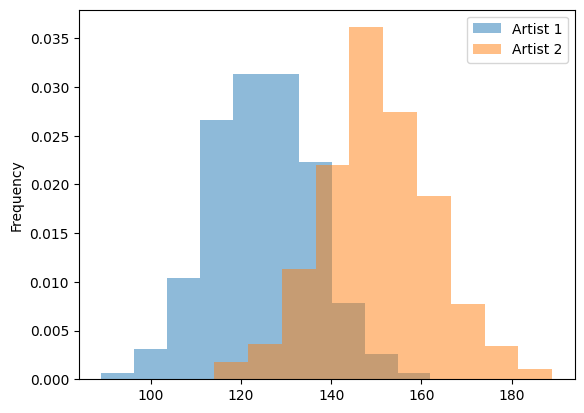

In [147]:
import matplotlib.pyplot as plt
%matplotlib inline
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: \s matches any whitespace character (equivalent to [\r\n\t\f\v ]) and 
+ matches the previous token between one and unlimited times, as many times as possible, giving back as needed (greedy).


In [ ]:
# This is not necessary since I already did all this earlier.
# collapse_whitespace = re.compile(r'\s+')

# def tokenize_lyrics(lyric) : 
#     """strip and split on whitespace"""
#     return([item.lower() for item in collapse_whitespace.split(lyric)])

In [149]:
# Your lyric length comparison chart here. 
lyrics_df['length'] = lyrics_df['tokens'].map(len)

artist
cher     AxesSubplot(0.125,0.11;0.775x0.77)
robyn    AxesSubplot(0.125,0.11;0.775x0.77)
Name: length, dtype: object

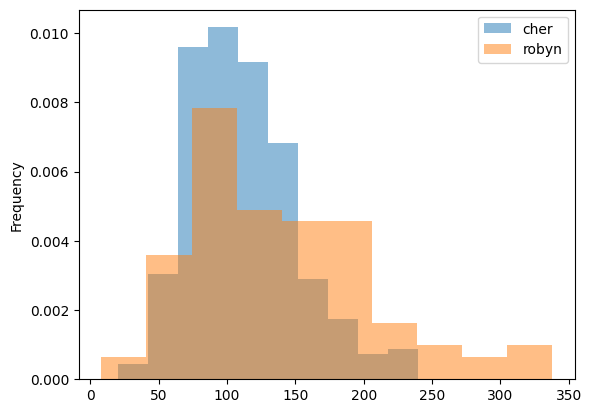

In [150]:
lyrics_df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)